In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler  
import joblib

In [2]:
#Cargar los 4 csv
car_data = pd.read_csv('C:/DATA/car data.csv')
car_dekho = pd.read_csv('C:/DATA/CAR DETAILS FROM CAR DEKHO.csv')
car_details_v3 = pd.read_csv('C:/DATA/Car details v3.csv')
car_details_v4 = pd.read_csv('C:/DATA/car details v4.csv')
print("car_data:")
print(car_data.head())
print("\ncar_dekho:")
print(car_dekho.head())
print("\ncar_details_v3:")
print(car_details_v3.head())
print("\ncar_details_v4:")
print(car_details_v4.head())

car_data:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

car_dekho:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250

In [3]:
# Estandarizar nombres de columnas en cada DataFrame
car_data.columns = ['name', 'year', 'selling_price', 'present_price', 'km_driven', 'fuel_type', 'seller_type', 'transmission', 'owner']
car_dekho.columns = ['name', 'year', 'selling_price', 'km_driven', 'fuel_type', 'seller_type', 'transmission', 'owner']
car_details_v3.columns = ['name', 'year', 'selling_price', 'km_driven', 'fuel_type', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']
car_details_v4.columns = ['make', 'model', 'price', 'year', 'km_driven', 'fuel_type', 'transmission', 'location', 'color', 'owner', 'seller_type', 'engine', 'max_power', 'torque', 'drivetrain', 'length', 'width', 'height', 'seating_capacity', 'fuel_tank_capacity']


print("Columnas después de estandarizar:")
print("car_data:", car_data.columns)
print("car_dekho:", car_dekho.columns)
print("car_details_v3:", car_details_v3.columns)
print("car_details_v4:", car_details_v4.columns)

Columnas después de estandarizar:
car_data: Index(['name', 'year', 'selling_price', 'present_price', 'km_driven',
       'fuel_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')
car_dekho: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel_type',
       'seller_type', 'transmission', 'owner'],
      dtype='object')
car_details_v3: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel_type',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats'],
      dtype='object')
car_details_v4: Index(['make', 'model', 'price', 'year', 'km_driven', 'fuel_type',
       'transmission', 'location', 'color', 'owner', 'seller_type', 'engine',
       'max_power', 'torque', 'drivetrain', 'length', 'width', 'height',
       'seating_capacity', 'fuel_tank_capacity'],
      dtype='object')


In [4]:
# Seleccionar columnas comunes y relevantes en cada DataFrame
car_data = car_data[['name', 'year', 'selling_price', 'present_price', 'km_driven', 'fuel_type', 'seller_type', 'transmission', 'owner']]
car_dekho = car_dekho[['name', 'year', 'selling_price', 'km_driven', 'fuel_type', 'seller_type', 'transmission', 'owner']]
car_details_v3 = car_details_v3[['name', 'year', 'selling_price', 'km_driven', 'fuel_type', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']]
car_details_v4 = car_details_v4[['make', 'model', 'price', 'year', 'km_driven', 'fuel_type', 'seller_type', 'transmission', 'owner', 'engine', 'max_power', 'seating_capacity']]

# Renombrar columnas en car_details_v4 para alinearlas con otros DataFrames
car_details_v4.rename(columns={'price': 'selling_price', 'make': 'name', 'model': 'model', 'seating_capacity': 'seats'}, inplace=True)

# Fusionar `make` y `model` en car_details_v4 para crear una columna `name` consistente con otros archivos
car_details_v4['name'] = car_details_v4['name'] + ' ' + car_details_v4['model']
car_details_v4.drop(columns=['model'], inplace=True)


print("car_data:", car_data.columns)
print("car_dekho:", car_dekho.columns)
print("car_details_v3:", car_details_v3.columns)
print("car_details_v4:", car_details_v4.columns)

car_data: Index(['name', 'year', 'selling_price', 'present_price', 'km_driven',
       'fuel_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')
car_dekho: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel_type',
       'seller_type', 'transmission', 'owner'],
      dtype='object')
car_details_v3: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel_type',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'seats'],
      dtype='object')
car_details_v4: Index(['name', 'selling_price', 'year', 'km_driven', 'fuel_type',
       'seller_type', 'transmission', 'owner', 'engine', 'max_power', 'seats'],
      dtype='object')


In [5]:
# Función para convertir columna a string, eliminar unidades y convertir a valores numéricos
def clean_column(dataframe, column, unit):
    dataframe[column] = dataframe[column].astype(str).str.replace(unit, '', regex=False).str.strip()
    dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce')  # Convierte a número, NaN si falla

# Aplicar la limpieza de unidades en car_details_v3
clean_column(car_details_v3, 'mileage', 'kmpl')
clean_column(car_details_v3, 'engine', 'CC')
clean_column(car_details_v3, 'max_power', 'bhp')

# Aplicar la limpieza de unidades en car_details_v4 (si existen las columnas)
if 'mileage' in car_details_v4.columns:
    clean_column(car_details_v4, 'mileage', 'kmpl')
if 'engine' in car_details_v4.columns:
    clean_column(car_details_v4, 'engine', 'CC')
if 'max_power' in car_details_v4.columns:
    clean_column(car_details_v4, 'max_power', 'bhp')

# Verificar que las columnas sean numéricas después de la limpieza
print("Tipos de datos después de limpiar:")
print("car_details_v3:\n", car_details_v3.dtypes)
print("car_details_v4:\n", car_details_v4.dtypes)

Tipos de datos después de limpiar:
car_details_v3:
 name              object
year               int64
selling_price      int64
km_driven          int64
fuel_type         object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object
car_details_v4:
 name              object
selling_price      int64
year               int64
km_driven          int64
fuel_type         object
seller_type       object
transmission      object
owner             object
engine           float64
max_power        float64
seats            float64
dtype: object


In [6]:
# Rellenar valores faltantes en columnas numéricas con la media
car_data.fillna({'selling_price': car_data['selling_price'].mean(), 'present_price': car_data['present_price'].mean(), 'km_driven': car_data['km_driven'].mean()}, inplace=True)
car_dekho.fillna({'selling_price': car_dekho['selling_price'].mean(), 'km_driven': car_dekho['km_driven'].mean()}, inplace=True)
car_details_v3.fillna({'selling_price': car_details_v3['selling_price'].mean(), 'km_driven': car_details_v3['km_driven'].mean(), 'mileage': car_details_v3['mileage'].mean(), 'engine': car_details_v3['engine'].mean(), 'max_power': car_details_v3['max_power'].mean(), 'seats': car_details_v3['seats'].mean()}, inplace=True)
car_details_v4.fillna({'selling_price': car_details_v4['selling_price'].mean(), 'km_driven': car_details_v4['km_driven'].mean(), 'engine': car_details_v4['engine'].mean(), 'max_power': car_details_v4['max_power'].mean(), 'seats': car_details_v4['seats'].mean()}, inplace=True)


# Para columnas categóricas, rellena con el valor más frecuente (moda)
for df in [car_data, car_dekho, car_details_v3, car_details_v4]:
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].fillna(df[column].mode()[0])


In [7]:
# Combinar todos los DataFrames en uno solo
data = pd.concat([car_data, car_dekho, car_details_v3, car_details_v4], ignore_index=True)

# Verifica el tamaño del DataFrame combinado y una muestra de los datos
print("Tamaño del DataFrame combinado:", data.shape)
print(data.head())

Tamaño del DataFrame combinado: (14828, 13)
      name  year  selling_price  present_price  km_driven fuel_type  \
0     ritz  2014           3.35           5.59      27000    Petrol   
1      sx4  2013           4.75           9.54      43000    Diesel   
2     ciaz  2017           7.25           9.85       6900    Petrol   
3  wagon r  2011           2.85           4.15       5200    Petrol   
4    swift  2014           4.60           6.87      42450    Diesel   

  seller_type transmission owner  mileage  engine  max_power  seats  
0      Dealer       Manual     0      NaN     NaN        NaN    NaN  
1      Dealer       Manual     0      NaN     NaN        NaN    NaN  
2      Dealer       Manual     0      NaN     NaN        NaN    NaN  
3      Dealer       Manual     0      NaN     NaN        NaN    NaN  
4      Dealer       Manual     0      NaN     NaN        NaN    NaN  


In [8]:
# Rellenar valores numéricos faltantes con la media de cada columna
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# Rellenar valores categóricos faltantes con la moda de cada columna
cat_cols = data.select_dtypes(include=['object']).columns
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verifica si aún hay valores faltantes
print(data.isnull().sum())

name             0
year             0
selling_price    0
present_price    0
km_driven        0
fuel_type        0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


In [13]:
# Limpiar valores nulos (modificar según necesidades)
data = data.dropna()

# Separar las características y la variable objetivo
X = data.drop('selling_price', axis=1)  # 'selling_price' es la columna objetivo
y = data['selling_price']

# Aplicar One Hot Encoding a las variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Escalar las variables numéricas
num_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_encoded[num_columns] = scaler.fit_transform(X_encoded[num_columns])

# Guardar el escalador
joblib.dump(scaler, 'scaler_linear.pkl')

['scaler_linear.pkl']

In [14]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [15]:
# Entrenar el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Guardar el modelo entrenado
joblib.dump(linear_model, 'car_price_predictor_linear_model.pkl')


['car_price_predictor_linear_model.pkl']

In [23]:
# Realizar predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Calcular métricas de desempeño
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 1444677570288750.8
MSE: 1.1391731458504726e+33
RMSE: 3.375163915797976e+16
R2 Score: -7.39689249969835e+20


C:\Users\SISTEMAS_PERSONERIA\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Numeric Columns : Index(['year', 'selling_price', 'present_price', 'km_driven', 'mileage',
       'engine', 'max_power', 'seats'],
      dtype='object')
Categorical Columns : Index(['name', 'fuel_type', 'seller_type', 'transmission', 'owner'], dtype='object')
Correlation Matrix : {'year': {'year': np.float64(1.0), 'selling_price': np.float64(0.36), 'present_price': np.float64(-0.0), 'km_driven': np.float64(-0.4), 'mileage': np.float64(0.22), 'engine': np.float64(0.01), 'max_power': np.float64(0.15), 'seats': np.float64(-0.02)}, 'selling_price': {'year': np.float64(0.36), 'selling_price': np.float64(1.0), 'present_price': np.float64(0.0), 'km_driven': np.float64(-0.18), 'mileage': np.float64(-0.06), 'engine': np.float64(0.23), 'max_power': np.float64(0.37), 'seats': np.float64(-0.01)}, 'present_price': {'year': np.float64(-0.0), 'selling_price': np.float64(0.0), 'present_price': np.float64(1.0), 'km_driven': np.float64(0.02), 'mileage': np.float64(0.0), 'engine': np.float64(-0.0), 'max_

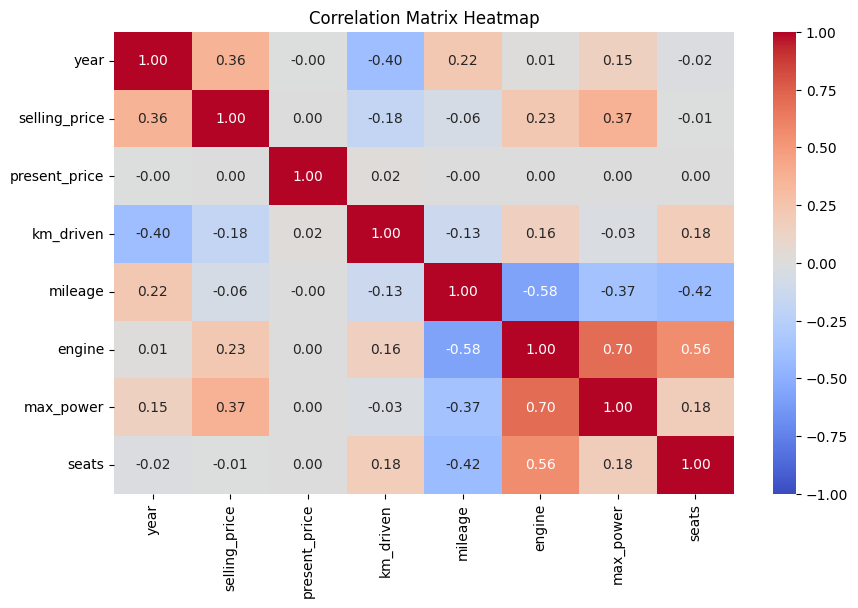

In [43]:
#Getting Correlation Matrix from Numerical Cols
number_cols = data.select_dtypes(include=['float64', 'int64']).columns
print(f"Numeric Columns : {number_cols}")
categorical_cols = data.select_dtypes(include=['object','category']).columns
print(f"Categorical Columns : {categorical_cols}")
num_cols = len(number_cols)
corr_matrix = {col : {col : 0 for col in number_cols} for col in number_cols}

for i in range(num_cols):
    for j in range(i, num_cols):
        col1 = number_cols[i]
        col2 = number_cols[j]

        mean1 = data[col1].mean()
        mean2 = data[col2].mean()

        covariance = ((data[col1] - mean1) * (data[col2] - mean2)).mean()

        std_dev1 = data[col1].std()
        std_dev2 = data[col2].std()

        correlation = round(covariance / (std_dev1 * std_dev2), 2)

        corr_matrix[col1][col2] = correlation
        corr_matrix[col2][col1] = correlation

print(f"Correlation Matrix : {corr_matrix}")

#Plotting Correlation Matrix Heatmap
corr_matrix2 = data.select_dtypes(include = ['float64', 'int64']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix2, annot = True, fmt = '.2f', cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [16]:
def predict_car_price_linear(car_attributes):
    # Cargar el modelo y el escalador
    model = joblib.load('car_price_predictor_linear_model.pkl')
    scaler = joblib.load('scaler_linear.pkl')

    # Convertir los datos de entrada en un DataFrame y aplicar One Hot Encoding
    input_data = pd.DataFrame([car_attributes])
    input_data_encoded = pd.get_dummies(input_data)
    
    # Asegurarse de que las columnas coinciden con las del conjunto de entrenamiento
    input_data_encoded = input_data_encoded.reindex(columns=X_train.columns, fill_value=0)

    # Escalar solo las columnas numéricas que se usaron en el entrenamiento
    input_data_encoded[num_columns] = scaler.transform(input_data_encoded[num_columns])

    # Realizar la predicción
    predicted_price = model.predict(input_data_encoded)

    return predicted_price[0]


In [17]:
# Establecer los atributos del automóvil que deseas predecir
car_attributes = {
    'year': 2018,
    'mileage': 30000,
    'fuel_type': 'Diesel',
    'transmission': 'Manual',
    # Se pueden añadir más atributos, pero para esta predicción estos son los valores que utilizaré
}

# Realizar la predicción
predicted_price = predict_car_price_linear(car_attributes)
print(f"El precio estimado del automóvil es: ${predicted_price:,.2f}")


El precio estimado del automóvil es: $28,187,627.60


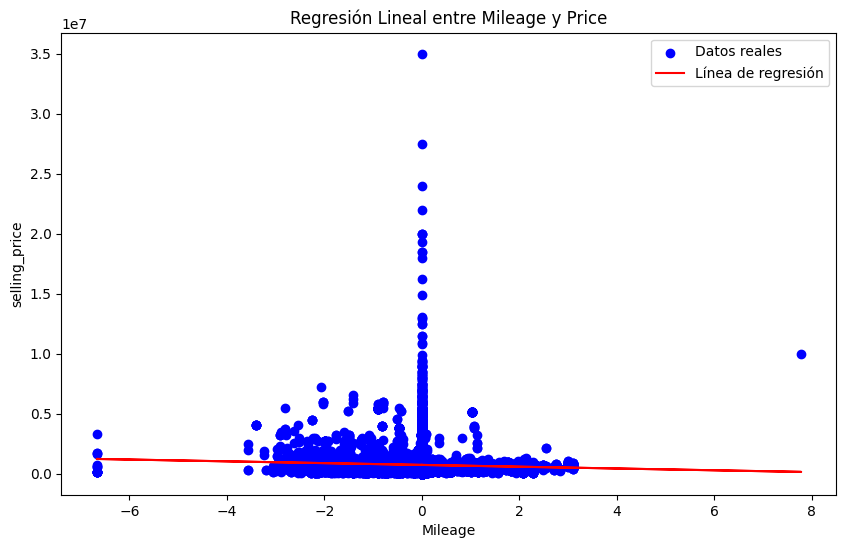

In [29]:

# Tomar solo una característica  para simplificar la gráfica
X_single_feature = X_encoded[['mileage']]
y = data['selling_price']

# Crear y entrenar el modelo con una sola característica
model = LinearRegression()
model.fit(X_single_feature, y)

# Predecir valores
y_pred = model.predict(X_single_feature)

# Graficar los valores reales vs. los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(X_single_feature, y, color='blue', label='Datos reales')
plt.plot(X_single_feature, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Mileage')
plt.ylabel('selling_price')
plt.title('Regresión Lineal entre Mileage y Price')
plt.legend()
plt.show()


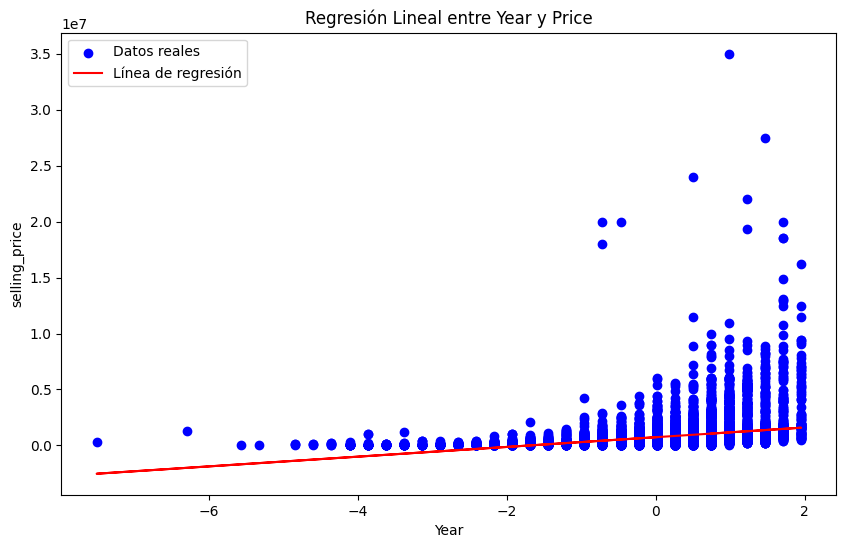

In [30]:

# Tomar solo una característica para simplificar la gráfica
X_single_feature = X_encoded[['year']]
y = data['selling_price']

# Crear y entrenar el modelo con una sola característica
model = LinearRegression()
model.fit(X_single_feature, y)

# Predecir valores
y_pred = model.predict(X_single_feature)

# Graficar los valores reales vs. los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(X_single_feature, y, color='blue', label='Datos reales')
plt.plot(X_single_feature, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Year')
plt.ylabel('selling_price')
plt.title('Regresión Lineal entre Year y Price')
plt.legend()
plt.show()


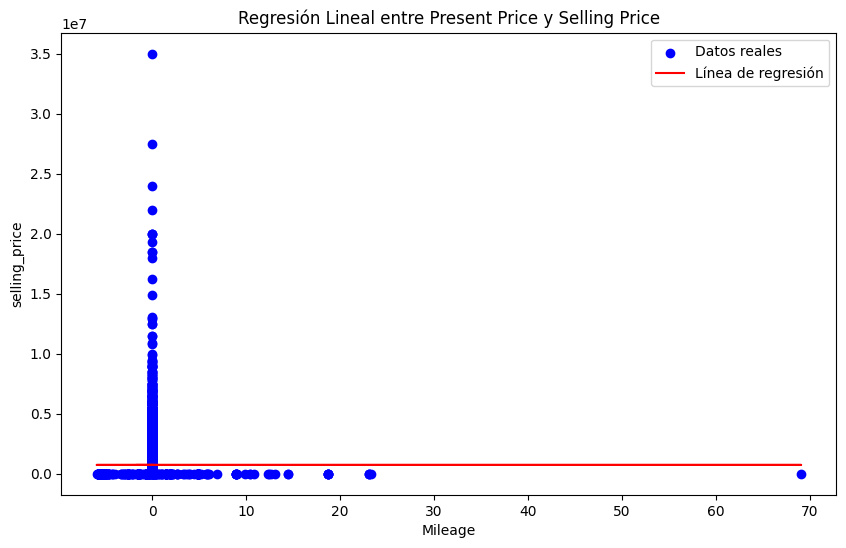

In [31]:

# Tomar solo una característica  para simplificar la gráfica
X_single_feature = X_encoded[['present_price']]
y = data['selling_price']

# Crear y entrenar el modelo con una sola característica
model = LinearRegression()
model.fit(X_single_feature, y)

# Predecir valores
y_pred = model.predict(X_single_feature)

# Graficar los valores reales vs. los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(X_single_feature, y, color='blue', label='Datos reales')
plt.plot(X_single_feature, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Present Price')
plt.ylabel('selling_price')
plt.title('Regresión Lineal entre Present Price y Selling Price')
plt.legend()
plt.show()


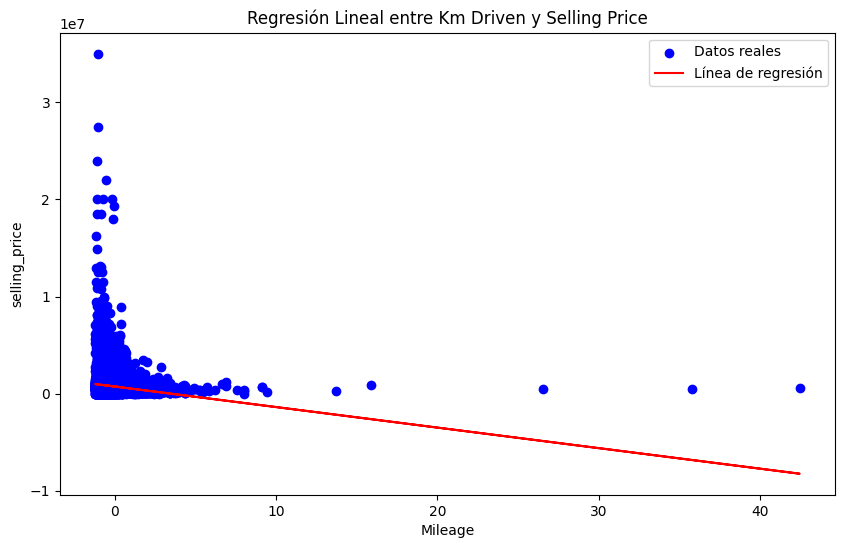

In [32]:

# Tomar solo una característica  para simplificar la gráfica
X_single_feature = X_encoded[['km_driven']]
y = data['selling_price']

# Crear y entrenar el modelo con una sola característica
model = LinearRegression()
model.fit(X_single_feature, y)

# Predecir valores
y_pred = model.predict(X_single_feature)

# Graficar los valores reales vs. los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(X_single_feature, y, color='blue', label='Datos reales')
plt.plot(X_single_feature, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Km Driven')
plt.ylabel('selling_price')
plt.title('Regresión Lineal entre Km Driven y Selling Price')
plt.legend()
plt.show()


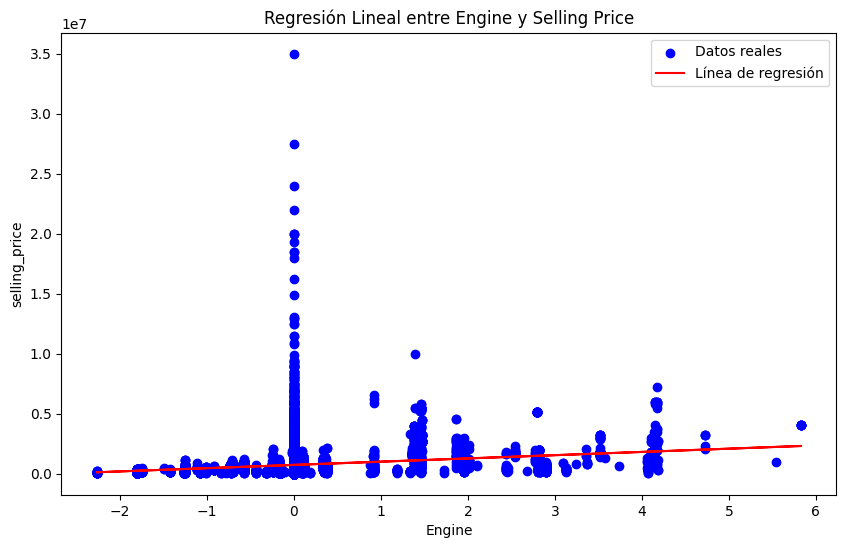

In [38]:

# Tomar solo una característica (por ejemplo, 'mileage') para simplificar la gráfica
X_single_feature = X_encoded[['engine']]
y = data['selling_price']

# Crear y entrenar el modelo con una sola característica
model = LinearRegression()
model.fit(X_single_feature, y)

# Predecir valores
y_pred = model.predict(X_single_feature)

# Graficar los valores reales vs. los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(X_single_feature, y, color='blue', label='Datos reales')
plt.plot(X_single_feature, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Engine')
plt.ylabel('selling_price')
plt.title('Regresión Lineal entre Engine y Selling Price')
plt.legend()
plt.show()
